In [1]:
import tqdm, os
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt

from dGbyG.utils.custom_tools import rapid_process_result, rapid_linear_reg
from dGbyG.network.Dataset import Train_Dataset
from dGbyG.network.GNNetwork import MP_network
from dGbyG.train.trainer import Model
from dGbyG.config import train_data_path, inference_model_path

In [4]:
TrainingData_df = pd.read_csv(train_data_path)
mean_std = TrainingData_df.loc[:,'std'].mean()

Scale = []
for n, sem in zip(TrainingData_df.loc[:,'n'], TrainingData_df.loc[:,'SEM']):
    if np.isnan(sem):
        scale = mean_std
    else:
        scale = (sem**2 + mean_std**2/n)**0.5
    Scale.append(scale)
Scale = np.array(Scale)

#SEM = np.nan_to_num(TrainingData_df.loc[:,'SEM'], nan=mean_std)

equation = TrainingData_df.loc[:, 'reaction']
standard_dG_prime = TrainingData_df.loc[:, 'standard_dg_prime']
weight = 1/np.array(Scale)/np.median(Scale) #(1/(SEM+1))/np.median((1/(SEM+1)))

TrainSet = Train_Dataset(equations=equation, dGs=standard_dG_prime, weights=weight)

In [5]:
atom = torch.zeros(size=(139,), dtype=torch.float64)
bond = torch.zeros(size=(23,), dtype=torch.float64)
for data in TrainSet:
    atom += data.x.sum(dim=0)
    bond += data.edge_attr.sum(dim=0)

<BarContainer object of 139 artists>

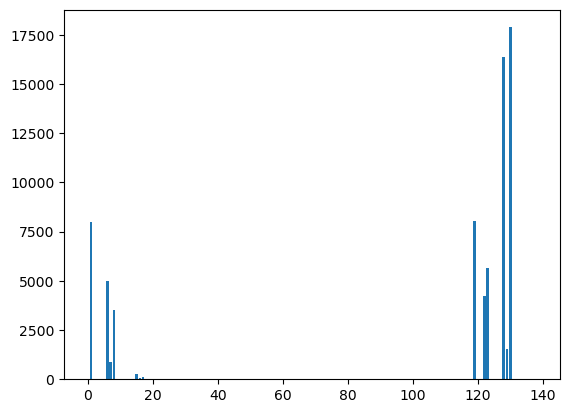

In [6]:

plt.bar(x=list(range(atom.shape[0])), height=atom)

<BarContainer object of 23 artists>

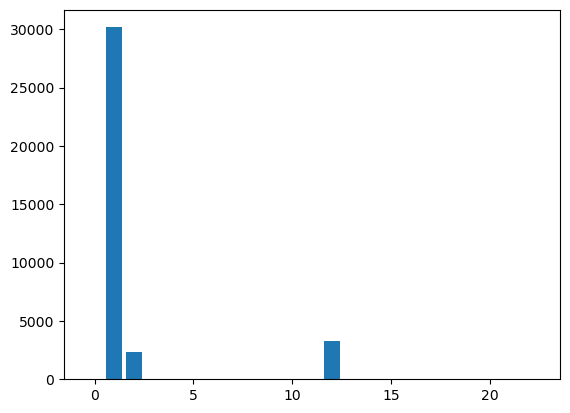

In [26]:
plt.bar(x=list(range(bond.shape[0])), height=bond)